In [102]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

In [103]:
tx_data = pd.read_csv('COVID-19-time-series-clean-complete.csv',encoding = "latin1")
tx_data.head(10)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
5,5,2020-01-22,Antigua and Barbuda,0,0,0.0,0.0,0,0,0
6,6,2020-01-22,Argentina,0,0,0.0,0.0,0,0,0
7,7,2020-01-22,Armenia,0,0,0.0,0.0,0,0,0
8,8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
9,9,2020-01-22,Austria,0,0,0.0,0.0,0,0,0


In [104]:
tx_data['Date'] = pd.to_datetime(tx_data['Date'])
tx_data['DateYearMonth'] = tx_data['Date'].map(lambda date: 100*date.year + date.month)
tx_data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0,202108
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0,202108
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0,202108
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0,202108


In [105]:
tx_april = tx_data.loc[(tx_data['DateYearMonth'] == 202004)]
tx_april

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004
...,...,...,...,...,...,...,...,...,...,...,...
19295,19295,2020-04-30,Vietnam,270,0,219.0,51.0,0,0,-3,202004
19296,19296,2020-04-30,West Bank and Gaza,344,2,76.0,266.0,0,0,5,202004
19297,19297,2020-04-30,Yemen,6,2,1.0,3.0,0,2,1,202004
19298,19298,2020-04-30,Zambia,106,3,55.0,48.0,9,0,1,202004


In [106]:
tx_april_max = tx_april.groupby('Country/Region')['Confirmed'].sum().reset_index().sort_values(by=['Confirmed'], ascending=False).head(8)
tx_april_max.head(8)

,Country/Region,Confirmed
179,US,19960815
162,Spain,5236777
84,Italy,4928524
65,Germany,3942925
61,France,3456319
183,United Kingdom,3328344
36,China,2500143
80,Iran,2255837


In [107]:
tx_iran = tx_data.loc[(tx_data['Country/Region'] == 'Iran')]
tx_iran.tail()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
107774,107774,2021-08-02,Iran,3940708,91407,3404533.0,444768.0,37189,411,19338,202108
107967,107967,2021-08-03,Iran,3979727,91785,3424650.0,463292.0,39019,378,20117,202108
108160,108160,2021-08-04,Iran,4019084,92194,3444798.0,482092.0,39357,409,20148,202108
108353,108353,2021-08-05,Iran,4057758,92628,0.0,3965130.0,38674,434,-3444798,202108
108546,108546,2021-08-06,Iran,4092671,93086,0.0,3999585.0,34913,458,0,202108


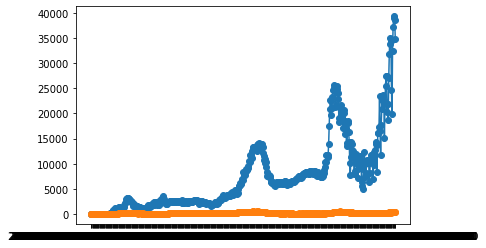

In [134]:
plt.plot(tx_iran['Date'].to_numpy(dtype='str'), tx_iran['New cases'], marker='o', label = 'New Cases')
plt.plot(tx_iran['Date'].to_numpy(dtype='str'), tx_iran['New deaths'], marker='o', label = 'New Deaths')

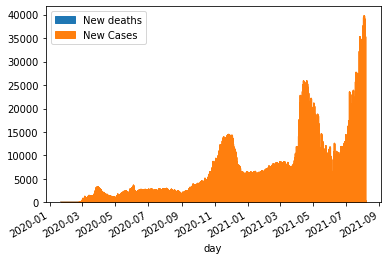

In [220]:
tx_iran = tx_data.loc[(tx_data['Country/Region'] == 'Iran')]
df = pd.DataFrame({'New deaths': tx_iran['New deaths'], 'New Cases' : tx_iran['New cases'], 'day' : tx_data['Date']})
ax = df.plot.area(x='day')